In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
df=df.drop(['id'], axis=1)
df=df.dropna(subset = ["bmi"])
df=df.drop(df[df["gender"]=="Other"].index)
df['age']=df['age'].astype('int')
df=df.drop(df[(df["stroke"]==1)& (df["age"]<10)].index)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 601.0+ KB


In [4]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [5]:
df['smoking_status'] = df['smoking_status'].apply(smoke)
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [6]:
X = df.drop('stroke',axis=1)
y = df["stroke"]

In [7]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('PR_Auc score')
    plt.legend(loc='best')
    plt.show()


In [8]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [9]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('PR_Auc score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

scaler=MinMaxScaler()
one_hot_encoder=OneHotEncoder()

numercial_cols=['age', 'bmi', 'avg_glucose_level']
catergorical_cols=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

data_prep=make_column_transformer((make_pipeline(scaler), numercial_cols),
                                  (make_pipeline(one_hot_encoder), catergorical_cols),
                                  remainder="passthrough")
s_kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=40)


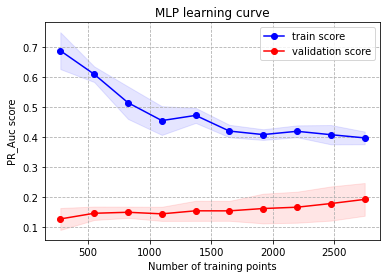

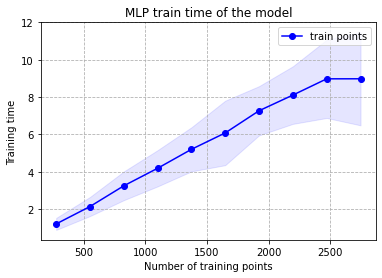

MLP: PR-Auc= 0.147
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.25      0.03      0.06        63

    accuracy                           0.95      1473
   macro avg       0.60      0.51      0.52      1473
weighted avg       0.93      0.95      0.94      1473

[[1404    6]
 [  61    2]]


In [23]:
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(data_prep,MLPClassifier(max_iter=300,random_state=40))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'MLP learning curve')
plot_train_time_curve(train_sizes, fit_times, 'MLP train time of the model')


from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate pr auc
y_pred = pipeline.predict(X_test)
yhat = pipeline.predict_proba(X_test)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('MLP: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

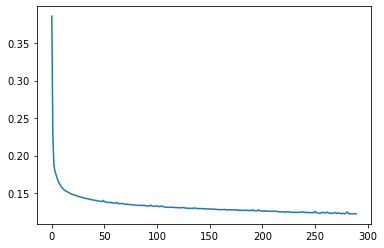

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 40,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [24]:
import matplotlib.pyplot as plt
plt.plot(pipeline.steps[1][1].loss_curve_)
plt.show()

pipeline.steps[1][1].get_params()


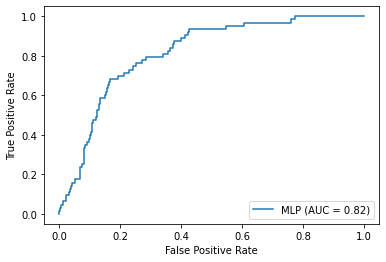

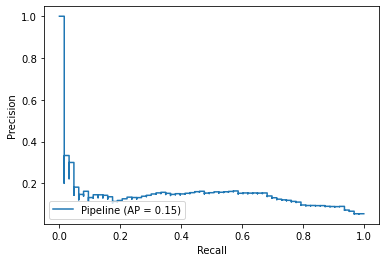

In [25]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
plot_roc_curve(pipeline, X_test, y_test, name = 'MLP')
plot_precision_recall_curve(pipeline, X_test, y_test)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
pipeline = make_pipeline(data_prep,MLPClassifier(max_iter=1000,random_state=40))
alphas=np.logspace(-6, -4, 20)
learning_rate=['constant','adaptive']
parameters = dict(mlpclassifier__hidden_layer_sizes=hidden_layer_sizes,mlpclassifier__alpha=alphas,mlpclassifier__learning_rate=learning_rate)
rd_search_cv = RandomizedSearchCV(pipeline, parameters,cv=s_kfold, n_iter=50,scoring='average_precision')
rd_search_cv.fit(X_train, y_train)
print("Tuned MLP best params: {}".format(rd_search_cv.best_params_))


Tuned MLP best params: {'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__hidden_layer_sizes': (100, 100, 100), 'mlpclassifier__alpha': 2.6366508987303555e-06}


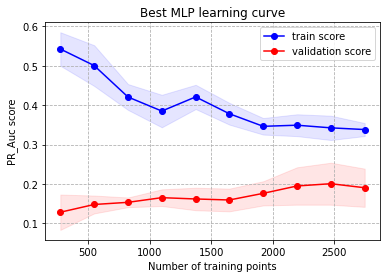

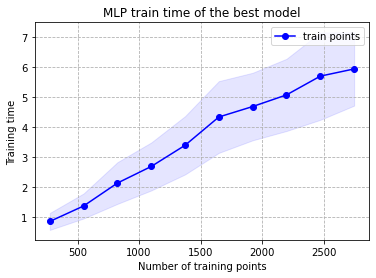

MLP: Predict Time= 0.017
MLP: PR-Auc= 0.169
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.50      0.03      0.06        63

    accuracy                           0.96      1473
   macro avg       0.73      0.52      0.52      1473
weighted avg       0.94      0.96      0.94      1473

[[1408    2]
 [  61    2]]


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix

pipeline = make_pipeline(data_prep,MLPClassifier(learning_rate='constant',max_iter=300, hidden_layer_sizes=(50,),alpha=0.00001,
                     solver='adam', random_state=40))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold, scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
plot_learning_curve(train_sizes, train_scores, test_scores,'Best MLP learning curve')
plot_train_time_curve(train_sizes, fit_times, 'MLP train time of the best model')

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate pr auc
import time
start = time.time()
y_pred = pipeline.predict(X_test)
yhat = pipeline.predict_proba(X_test)
diff=time.time() - start
print('MLP: Predict Time= %.3f' %  diff)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('MLP: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

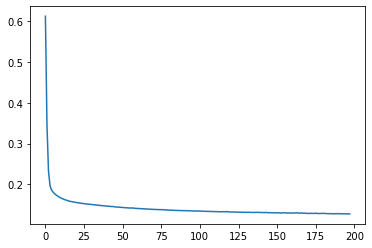

{'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (75,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 40,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
import matplotlib.pyplot as plt
plt.plot(pipeline.steps[1][1].loss_curve_)
plt.show()

pipeline.steps[1][1].get_params()

In [11]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,MLPClassifier(max_iter=300,random_state=40))
alphas=np.logspace(-3, 0, 20)
train_scores, test_scores = validation_curve(
        estimator= pipeline, X=X_train, y=y_train, param_name="mlpclassifier__alpha", param_range=alphas,
        cv=s_kfold, scoring="average_precision", n_jobs=-1)
plot_validation_curve(alphas, train_scores, test_scores, 'alpha', title="Validation Curve for alpha", alpha=0.1)

NameError: name 'MLPClassifier' is not defined